In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns; sns.set()
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier

In [151]:
!pip install -U scikit-learn imbalanced-learn

In [152]:
dataset = pd.read_csv("C:/Users/User/Downloads/uci datasets/data.csv", delimiter=';')


In [153]:
#displaying the first five rows of the dataset to have a feel of the dataset
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [154]:
#checking for missing values
dataset.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [155]:
#displaying the number of rows and columns
dataset.shape

(4424, 37)

REMOVING NEGATIVE VALUES FROM INFLATION AND GDP COLUMN

In [156]:
df = ['Inflation rate', 'GDP']
for i in df:
    col = dataset[i].median()
    dataset[i] = dataset[i].apply(lambda x: col if x < 0 else x)    

In [157]:
#checking for negative values
numeric_cols = dataset.select_dtypes(include=['number'])  
negative_values = (numeric_cols < 0).sum()

print("Count of negative values in each numeric column:\n", negative_values)

Count of negative values in each numeric column:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship ho

In [158]:
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,1.4,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,1.4,0.32,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,1.4,0.79,Graduate


In [159]:
#showing the statistical representation of the dataset
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.642948,1.102249
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.021937,0.990632
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,0.300000,0.320000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.600000,0.320000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [160]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [161]:
dataset.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

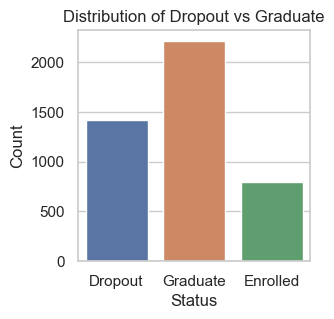

In [192]:
# plotting to see the count of variables in the the target column
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(3,3))
sns.countplot(x=dataset['Target'], ax=ax)
ax.set_title('Distribution of Dropout vs Graduate')
ax.set_xlabel('Status')
ax.set_ylabel('Count')
plt.show()


The visualization shows the distribution of students who have either dropped out or graduated. And the dataset appears to be imbalance.

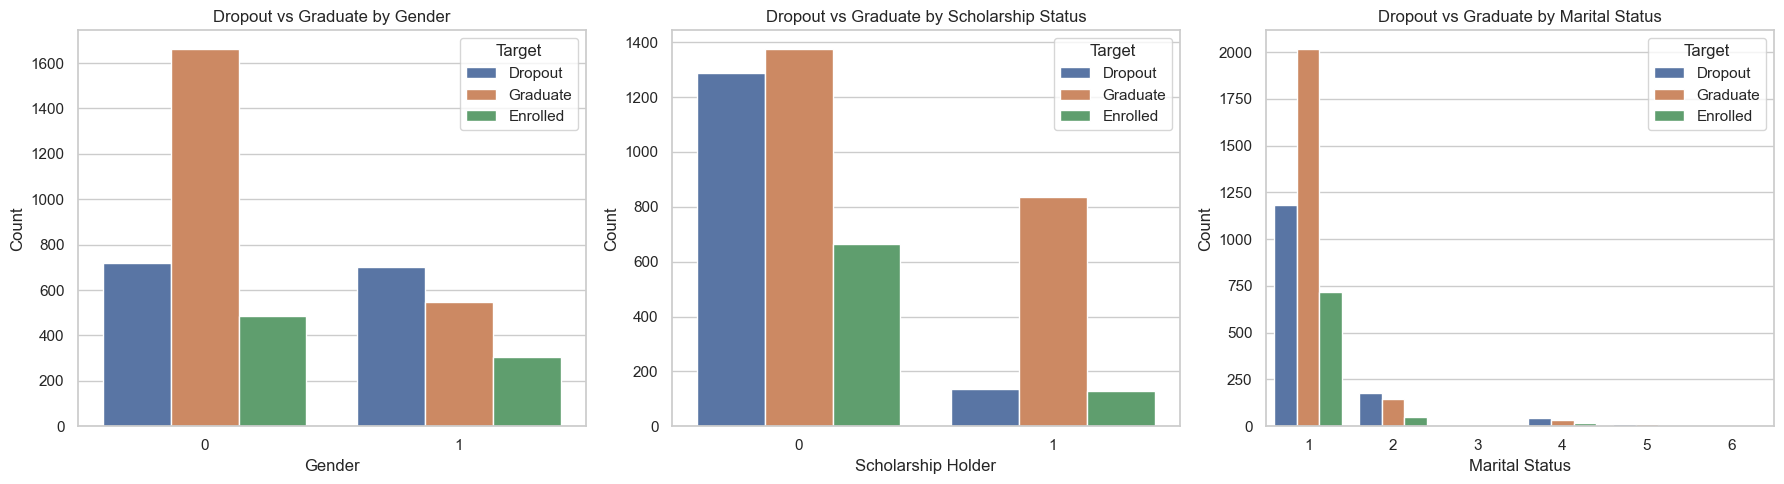

In [163]:
# plotting the variables to analyze: Gender, Scholarship holder, and Marital status
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# for Gender
sns.countplot(x='Gender', hue='Target', data=dataset, ax=axes[0])
axes[0].set_title('Dropout vs Graduate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# for Scholarship holder
sns.countplot(x='Scholarship holder', hue='Target', data= dataset, ax=axes[1])
axes[1].set_title('Dropout vs Graduate by Scholarship Status')
axes[1].set_xlabel('Scholarship Holder')
axes[1].set_ylabel('Count')

# for Marital status
sns.countplot(x='Marital status', hue='Target', data=dataset, ax=axes[2])
axes[2].set_title('Dropout vs Graduate by Marital Status')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


The dropout rate appears to be somewhat similar across different genders, although a slight difference in proportions can be noted.but in general females graduate more
There is a noticeable difference in dropout rates between scholarship holders and non-scholarship holders, suggesting scholarships may have an impact on dropout rates.meaning students with scholarship tend not to drop out.
Different marital statuses show variations in dropout rates, which could indicate a possible influence on a student's decision to continue education.

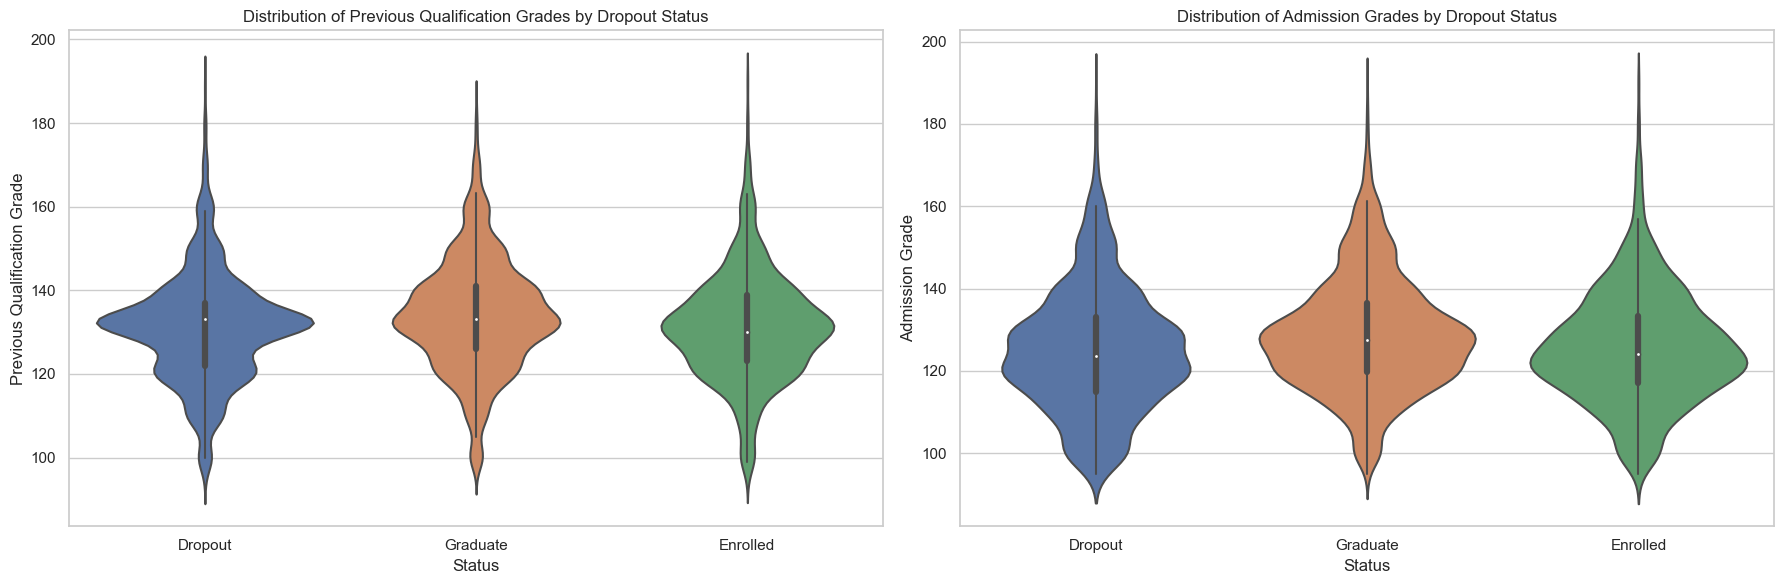

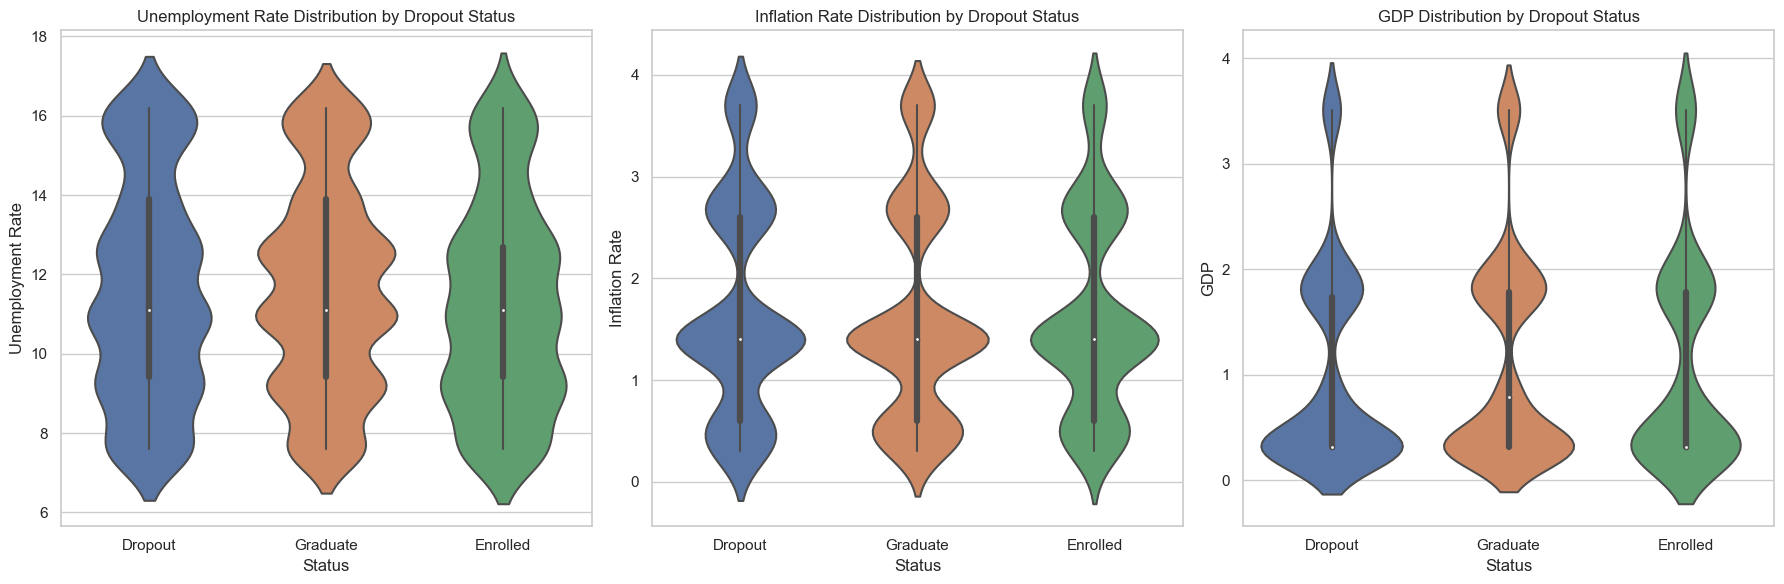

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# for Previous qualification (grade)
sns.violinplot(x='Target', y='Previous qualification (grade)', data=dataset, ax=axes[0])
axes[0].set_title('Distribution of Previous Qualification Grades by Dropout Status')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Previous Qualification Grade')

# for Admission grade
sns.violinplot(x='Target', y='Admission grade', data=dataset, ax=axes[1])
axes[1].set_title('Distribution of Admission Grades by Dropout Status')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Admission Grade')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# for Unemployment rate
sns.violinplot(x='Target', y='Unemployment rate', data=dataset, ax=axes[0])
axes[0].set_title('Unemployment Rate Distribution by Dropout Status')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Unemployment Rate')

# for Inflation rate
sns.violinplot(x='Target', y='Inflation rate', data=dataset, ax=axes[1])
axes[1].set_title('Inflation Rate Distribution by Dropout Status')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Inflation Rate')

# for GDP
sns.violinplot(x='Target', y='GDP', data=dataset, ax=axes[2])
axes[2].set_title('GDP Distribution by Dropout Status')
axes[2].set_xlabel('Status')
axes[2].set_ylabel('GDP')

plt.tight_layout()
plt.show()


For previous qualification grades, enrolled students have the highest median grade, followed by graduates, then dropout students. The distribution of enrolled students is the most spread out, while the distribution of dropout students is the most narrow. This suggests that there is more variability in the previous qualification grades of enrolled students than there is in the previous qualification grades of dropout students.
Graduates had the highest median grade for admission, followed by enrolled students and dropout students. Dropout and enrolled student distributions are comparable, with enrolled students' distribution being somewhat broader. This shows that entrance grades rather than prior qualification grades may be a more accurate indicator of a student's graduation rate.

All things considered, the violin plot implies that there is a connection between dropout status and prior qualifying and admission grades. While students with lower grades are more likely to drop out, those with higher marks are more likely to enroll in classes or graduate.
Based on the violin plot, graduates and enrolled students tend to have a lower unemployment rate than dropouts.
There is no significant difference in inflation rate across dropout status based on the violin plot.


C:\Users\User\AppData\Local\Temp\ipykernel_12720\3456723021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_data['Target'] = matrix_data['Target'].astype('category').cat.codes  # Converting Target to numeric for visualization


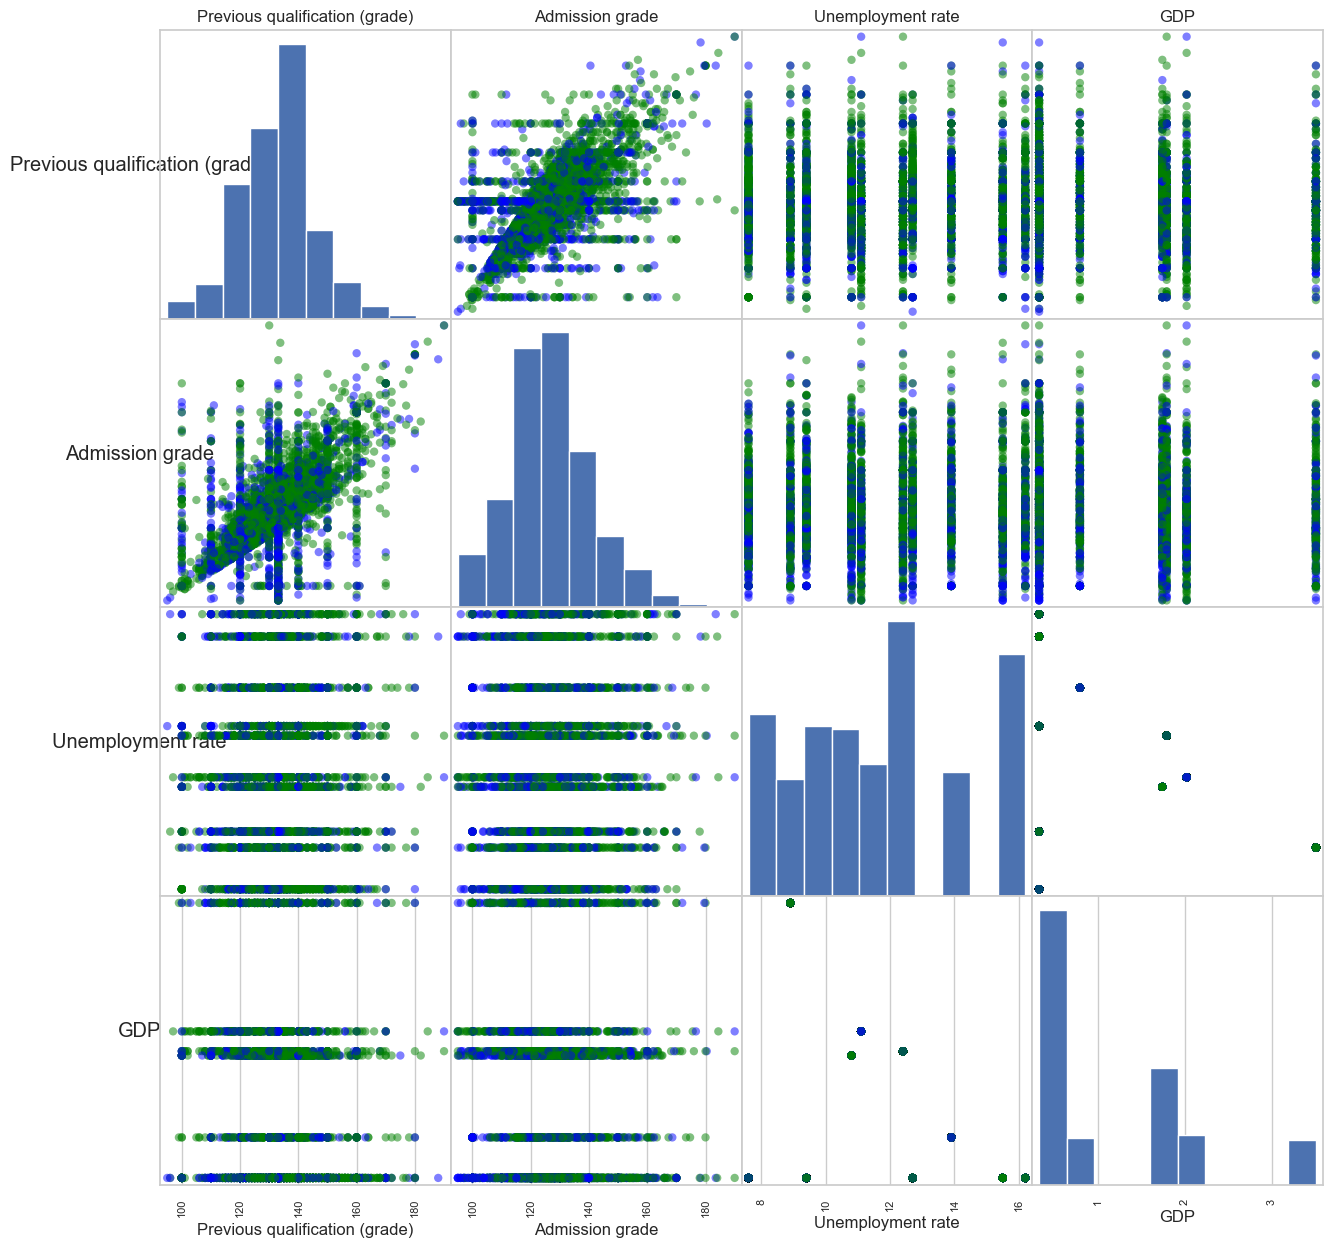

In [165]:
# plotting numerical variables for the scatter plot matrix
selected_columns_matrix = ['Previous qualification (grade)', 'Admission grade', 'Unemployment rate', 'GDP', 'Target']
matrix_data = dataset[selected_columns_matrix]
matrix_data['Target'] = matrix_data['Target'].astype('category').cat.codes  # Converting Target to numeric for visualization

# showing the scatter plot matrix
colors = ['blue' if x == 0 else 'green' for x in matrix_data['Target']]
axes = scatter_matrix(matrix_data.iloc[:, :-1], alpha=0.5, figsize=(15, 15), diagonal='hist', color=colors, marker='o', grid=True)

# Setting titles and ticks
for ax, col in zip(axes[0], selected_columns_matrix[:-1]):
    ax.set_title(col)
    ax.xaxis.set_ticks([])
for ax, col in zip(axes[:,0], selected_columns_matrix[:-1]):
    ax.set_ylabel(col, rotation=0, size='large', labelpad=15)
    ax.yaxis.set_ticks([])

plt.show()


This visualization helps to depict relationships between variables at a glance and to identify potential patterns that could inform further analysis or intervention strategies. For example, it shows that higher grades are often associated with graduation (more green in the upper ranges of grade plots), and there might be economic contexts (observed in the scatter plots involving GDP and unemployment) that influence these outcomes.

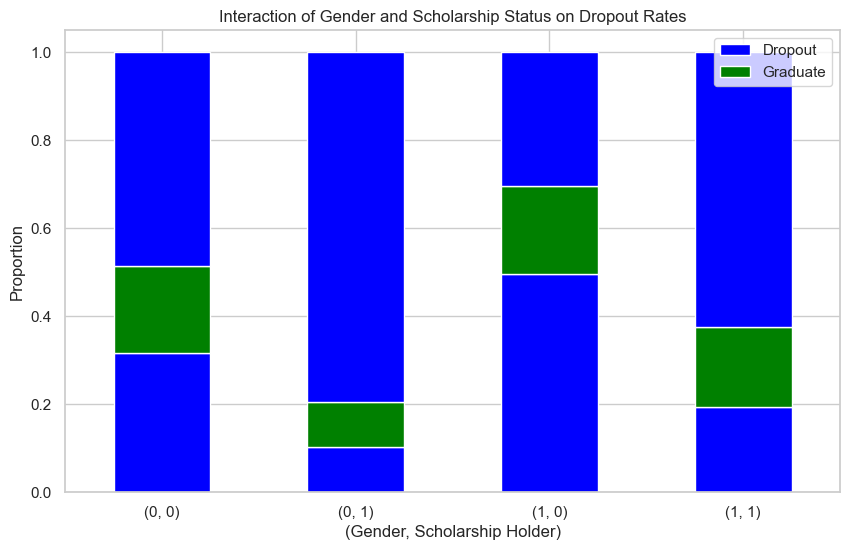

In [166]:
# displaying an Interaction effects between Gender and Scholarship holder
interaction_plot = pd.crosstab(index=[dataset['Gender'], dataset['Scholarship holder']],
                               columns=dataset['Target'],
                               normalize='index')

# showing the interaction effects
interaction_plot.plot(kind='bar', stacked=True, color=['blue', 'green'], figsize=(10, 6))
plt.title('Interaction of Gender and Scholarship Status on Dropout Rates')
plt.xlabel('(Gender, Scholarship Holder)')
plt.ylabel('Proportion')
plt.legend(['Dropout', 'Graduate'], loc='upper right')
plt.xticks(rotation=0)  # Keep the labels on the x-axis readable
plt.show()


Certain combinations may show higher proportions of graduates or dropouts. For instance, if we see that one particular group (like females with scholarships) has a much larger green segment, it might suggest that scholarships are particularly effective for that gender in promoting graduation.
It's also visible if any group has a particularly high dropout rate (larger blue segments), which might indicate areas where targeted interventions could be most needed.

In [167]:
#encoding the columns by converting a string into number
label_encoder = LabelEncoder()
df_encoded = dataset.copy()
df_encoded['Target'] = label_encoder.fit_transform(dataset['Target'])

In [168]:
#checking if the target column has been encoded
df_encoded['Target'].unique()

array([0, 2, 1])

In [169]:
# checking for the unique count of each taget class
unique_counts = df_encoded['Target'].value_counts()
print(unique_counts)

Target
2    2209
0    1421
1     794
Name: count, dtype: int64


BALANCING THE DATASET

In [170]:
from sklearn.utils import resample

# SeparatING the different classes
df_class_0 = df_encoded[df_encoded['Target'] == 0]
df_class_1 = df_encoded[df_encoded['Target'] == 1]
df_class_2 = df_encoded[df_encoded['Target'] == 2]

# Resampling the classes with fewer instances
df_class_0_resampled = resample(df_class_0,
                                replace=True,       
                                n_samples=len(df_class_2),
                                random_state=123)   

df_class_1_resampled = resample(df_class_1,
                                replace=True,       
                                n_samples=len(df_class_2),
                                random_state=123)  

# Combining the resampled classes back into one DataFrame
df_resampled = pd.concat([df_class_0_resampled, df_class_1_resampled, df_class_2])

# Shuffle the order of samples
df_resampled = df_resampled.sample(frac=1).reset_index(drop=True)


In [171]:
print(df_resampled['Target'].value_counts())


Target
0    2209
1    2209
2    2209
Name: count, dtype: int64


In [172]:
df_encoded = df_resampled

FEATURE SELECTION

In [173]:
# Calculating correlations with the target
correlations = df_encoded.drop('Target', axis=1).apply(lambda x: x.corr(df_encoded['Target']))

# Sorting the correlations in ascending order 
correlations_sorted = correlations.abs().sort_values(ascending=False)

# arranging the data for Random Forest
x = df_encoded.drop('Target', axis=1)
Y = df_encoded['Target']

# Fit a Random Forest to find feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(x,Y)

# Getting feature importances from the Random Forest model
feature_importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)

correlations_sorted, feature_importances


(Curricular units 2nd sem (approved)               0.592421
 Curricular units 2nd sem (grade)                  0.526894
 Curricular units 1st sem (approved)               0.497813
 Curricular units 1st sem (grade)                  0.444925
 Tuition fees up to date                           0.375436
 Scholarship holder                                0.288648
 Age at enrollment                                 0.241959
 Debtor                                            0.226557
 Gender                                            0.215087
 Application mode                                  0.206405
 Curricular units 2nd sem (enrolled)               0.151026
 Curricular units 1st sem (enrolled)               0.134587
 Admission grade                                   0.118795
 Displaced                                         0.105951
 Marital status                                    0.092976
 Previous qualification (grade)                    0.089959
 Curricular units 2nd sem (evaluations) 

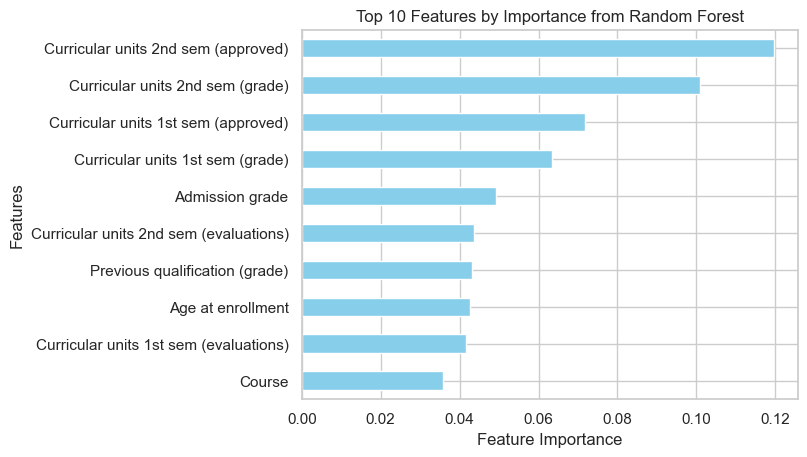

In [174]:
# plotting the top 10 most important features
top_features = feature_importances.head(10)
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.title('Top 10 Features by Importance from Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


In [175]:
#splitting our dataset into x and y
X = df_encoded.drop(columns=['Target','Application mode','GDP','Displaced','Application order', 'Nacionality',
                    'Educational special needs', 'Unemployment rate'], axis = 1)
y = df_encoded['Target']

KNN MODEL

In [193]:
# Split my dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the KNN Model with a pipeline that includes scaling
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=8))

# Training the model on the training dataset
knn_pipeline.fit(X_train, y_train)

# Testing the model on the testing set
y_pred = knn_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Training set score {:2f}".format(knn_pipeline.score(X_train,y_train)))
print("Test set score: {:.2f}".format(knn_pipeline.score(X_test, y_test)))
print("Accuracy of the knn model:", test_accuracy)






Training set score 0.776457
Test set score: 0.72
Accuracy of the knn model: 0.7164404223227753


CALCULATING THE CROSS VAL SCORE

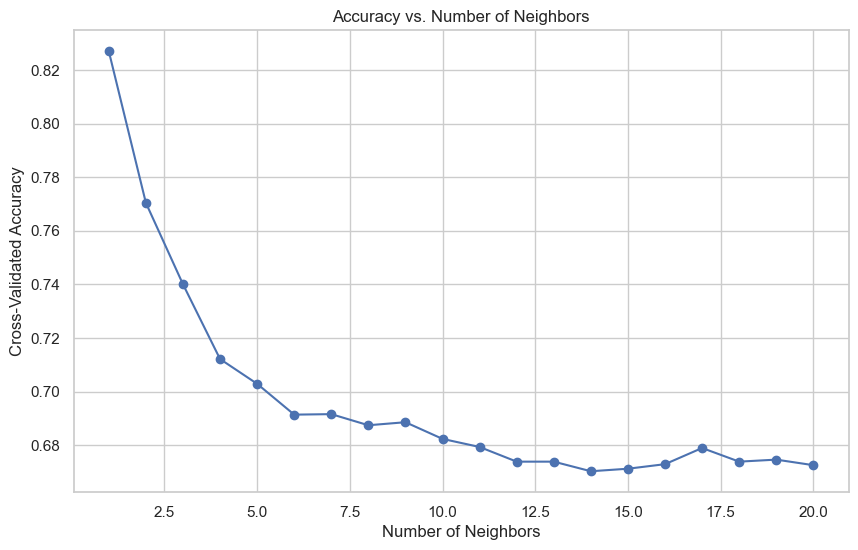

In [177]:
# Data split
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)

#setting the Range of neighbors to test
neighbors_range = range(1, 21)

# List to store average CV scores for each number of neighbors
cv_scores = []

# Looping over the range of number of neighbors
for n in neighbors_range:
    knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n))
    # Perform cross-validation and store the average accuracy
    scores = cross_val_score(knn_pipeline, X_train_final, y_train_final, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()


GRADIENT BOOSTING METHOD

In [178]:
# Since we're using GBM, scaling is not necessary, but it doesn't hurt.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup the GBM model
gbm_pipeline = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))

# Training the model
gbm_pipeline.fit(X_train, y_train)

# Predict the outcomes for the test set
y_predict = gbm_pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy of the GBM model:", accuracy)
print(classification_report(y_test,y_predict))
print("Training set score {:2f}".format(gbm_pipeline.score(X_train,y_train)))
print("Test set score: {:.2f}".format(gbm_pipeline.score(X_test, y_test)))



Accuracy of the GBM model: 0.7790346907993967
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       444
           1       0.69      0.76      0.72       442
           2       0.80      0.83      0.81       440

    accuracy                           0.78      1326
   macro avg       0.79      0.78      0.78      1326
weighted avg       0.79      0.78      0.78      1326

Training set score 0.815318
Test set score: 0.78


<Figure size 800x600 with 0 Axes>

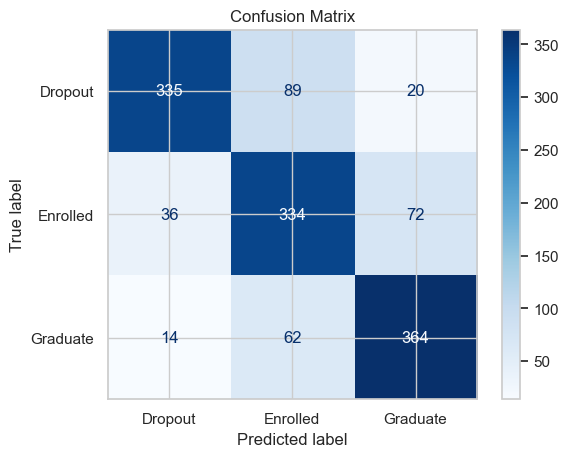

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Top-left Cell (Dropout, Dropout): 335 instances were correctly predicted as "Dropout".
Top-middle Cell (Dropout, Enrolled): 89 instances were actual dropouts but were incorrectly predicted as "Enrolled".
Top-right Cell (Dropout, Graduate): 20instances were actual dropouts but were incorrectly predicted as "Graduate".
Middle-left Cell (Enrolled, Dropout): 36 instances were actually "Enrolled" but predicted as "Dropout".
Middle Cell (Enrolled, Enrolled): 334 instances were correctly predicted as "Enrolled".
Middle-right Cell (Enrolled, Graduate): 72 instances were actually "Enrolled" but predicted as "Graduate".
Bottom-left Cell (Graduate, Dropout): 14 instances were actually "Graduate" but predicted as "Dropout".
Bottom-middle Cell (Graduate, Enrolled): 62 instances were actually "Graduate" but predicted as "Enrolled".
Bottom-right Cell (Graduate, Graduate): 364 instances were correctly predicted as "Graduate".

Diagonal Cells (335, 334, 364): These represent correct predictions for each class, 
    indicating the model's true positive rate for each class.

SUPPORT VECTOR MACHINE

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       444
           1       0.56      0.63      0.60       442
           2       0.73      0.79      0.76       440

    accuracy                           0.69      1326
   macro avg       0.71      0.69      0.69      1326
weighted avg       0.71      0.69      0.69      1326

0.6923076923076923
Training set score 0.708923
Test set score: 0.69


<Figure size 800x600 with 0 Axes>

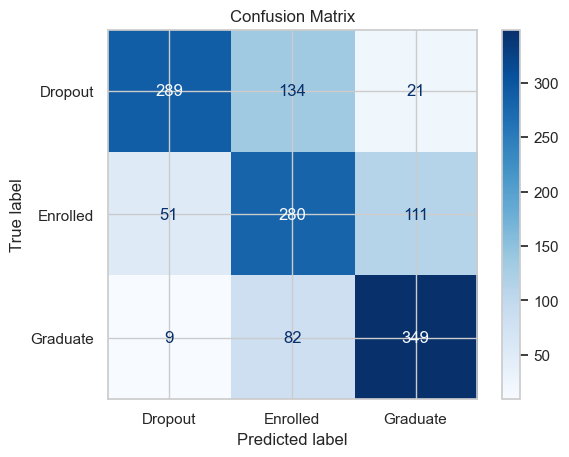

In [198]:
# Spliting the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the SVM with a pipeline that includes scaling
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('svm', SVC(kernel='linear', C=1)) 
])

# Training the SVM model on the training data
svm_pipeline.fit(X_train, y_train)

# Predicting the outcomes for the test set
y_prediction = svm_pipeline.predict(X_test)

# Printing the classification report to see the performance
print(classification_report(y_test, y_prediction))
print(accuracy_score(y_test, y_prediction))
print("Training set score {:2f}".format(svm_pipeline.score(X_train,y_train)))
print("Test set score: {:.2f}".format(svm_pipeline.score(X_test, y_test)))

#plotting confusion matrix
cmt = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=label_encoder.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Top-left Cell (Dropout, Dropout): 289 instances were correctly predicted as "Dropout".
Top-middle Cell (Dropout, Enrolled): 134 instances were actual dropouts but were incorrectly predicted as "Enrolled".
Top-right Cell (Dropout, Graduate): 21instances were actual dropouts but were incorrectly predicted as "Graduate".
Middle-left Cell (Enrolled, Dropout): 51 instances were actually "Enrolled" but predicted as "Dropout".
Middle Cell (Enrolled, Enrolled): 280 instances were correctly predicted as "Enrolled".
Middle-right Cell (Enrolled, Graduate): 111 instances were actually "Enrolled" but predicted as "Graduate".
Bottom-left Cell (Graduate, Dropout): 9 instances were actually "Graduate" but predicted as "Dropout".
Bottom-middle Cell (Graduate, Enrolled): 82 instances were actually "Graduate" but predicted as "Enrolled".
Bottom-right Cell (Graduate, Graduate): 349 instances were correctly predicted as "Graduate".

Diagonal Cells (289, 280, 349): These represent correct predictions for each class, 
indicating the model's true positive rate for each class.

LOGISTIC REGRESSION

Accuracy of Logistic Regression model: 0.6990950226244343
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.68      0.74       444
           1       0.59      0.58      0.59       442
           2       0.71      0.83      0.76       440

    accuracy                           0.70      1326
   macro avg       0.70      0.70      0.70      1326
weighted avg       0.71      0.70      0.70      1326

Training set score 0.711187
Test set score: 0.70


<Figure size 800x600 with 0 Axes>

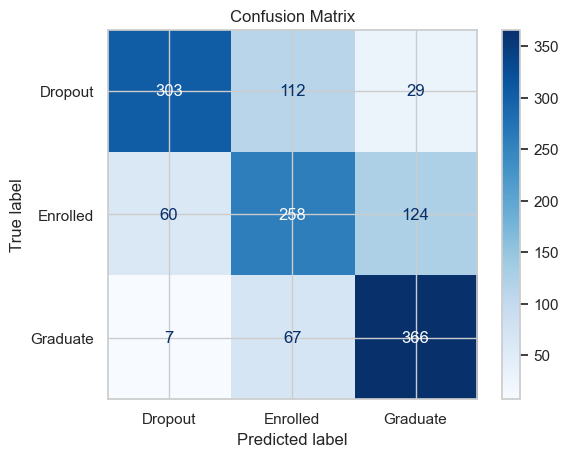

In [181]:
# Spliting the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seting up the Logistic Regression with a pipeline for scaling features
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('logistic', LogisticRegression(random_state=42, solver='liblinear'))
])

# Train the Logistic Regression model on the training data
logistic_pipeline.fit(X_train, y_train)

# Predicting the outcomes for the test set
prediction = logistic_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, prediction)
classification_rep = classification_report(y_test, prediction)

print("Accuracy of Logistic Regression model:", accuracy)
print("Classification report:\n", classification_rep)
print("Training set score {:2f}".format(logistic_pipeline.score(X_train,y_train)))
print("Test set score: {:.2f}".format(logistic_pipeline.score(X_test, y_test)))

#plotting the confusion matrix
c_matrix= confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=label_encoder.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Top-left Cell (Dropout, Dropout): 303 instances were correctly predicted as "Dropout".
Top-middle Cell (Dropout, Enrolled): 112 instances were actual dropouts but were incorrectly predicted as "Enrolled".
Top-right Cell (Dropout, Graduate): 29instances were actual dropouts but were incorrectly predicted as "Graduate".
Middle-left Cell (Enrolled, Dropout):60 instances were actually "Enrolled" but predicted as "Dropout".
Middle Cell (Enrolled, Enrolled): 258 instances were correctly predicted as "Enrolled".
Middle-right Cell (Enrolled, Graduate): 124 instances were actually "Enrolled" but predicted as "Graduate".
Bottom-left Cell (Graduate, Dropout): 7 instances were actually "Graduate" but predicted as "Dropout".
Bottom-middle Cell (Graduate, Enrolled): 67 instances were actually "Graduate" but predicted as "Enrolled".
Bottom-right Cell (Graduate, Graduate): 366 instances were correctly predicted as "Graduate".

Diagonal Cells (303, 258, 366): These represent correct predictions for each class, 
indicating the model's true positive rate for each class.

RANDOM FOREST CLASSIFIER

0.9223227752639518
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       444
           1       0.87      0.95      0.91       442
           2       0.93      0.91      0.92       440

    accuracy                           0.92      1326
   macro avg       0.92      0.92      0.92      1326
weighted avg       0.92      0.92      0.92      1326

Training set score 1.000000
Test set score: 0.92


<Figure size 800x600 with 0 Axes>

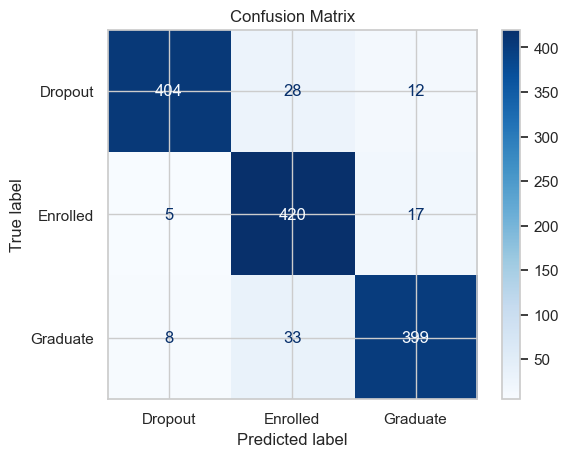

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Instatiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print("Training set score {:2f}".format(rf_classifier.score(X_train,y_train)))
print("Test set score: {:.2f}".format(rf_classifier.score(X_test, y_test)))

#plotting the confusion matrix
confusion_matrix= confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=label_encoder.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()




Top-left Cell (Dropout, Dropout): 404 instances were correctly predicted as "Dropout".
Top-middle Cell (Dropout, Enrolled): 28 instances were actual dropouts but were incorrectly predicted as "Enrolled".
Top-right Cell (Dropout, Graduate): 12instances were actual dropouts but were incorrectly predicted as "Graduate".
Middle-left Cell (Enrolled, Dropout): 5 instances were actually "Enrolled" but predicted as "Dropout".
Middle Cell (Enrolled, Enrolled): 420 instances were correctly predicted as "Enrolled".
Middle-right Cell (Enrolled, Graduate): 17 instances were actually "Enrolled" but predicted as "Graduate".
Bottom-left Cell (Graduate, Dropout): 8 instances were actually "Graduate" but predicted as "Dropout".
Bottom-middle Cell (Graduate, Enrolled): 33 instances were actually "Graduate" but predicted as "Enrolled".
Bottom-right Cell (Graduate, Graduate): 399 instances were correctly predicted as "Graduate".

Diagonal Cells (404, 420, 399): These represent correct predictions for each class, 
indicating the model's true positive rate for each class.